Check custom scaling outputs
============================

In [1629]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BQ
import util_funcs as uf
from google.cloud import bigquery
CLIENT = bigquery.Client()


In [1630]:
output_folder = 'Outputs/'
output_prices = pd.read_csv(output_folder+'Price_Changes_Scaling_20231212.csv', dtype={'GPI': str, 'NDC': str})

In [1631]:
output_prices

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID
0,MAC41461,72600090000110,********,***********,NaN,20232922,20391231,0.2421,4146,0.24210,CS20240129000000000004146
1,MAC41461,65990002200305,********,***********,NaN,20232922,20391231,4.3838,4146,4.38380,CS20240129000000000004146
2,MAC41461,72600020006920,********,***********,NaN,20232922,20391231,2.5105,4146,2.51050,CS20240129000000000004146
3,MAC41461,58160045107030,********,***********,NaN,20232922,20391231,3.4501,4146,3.45010,CS20240129000000000004146
4,MAC41461,21402420000320,********,***********,NaN,20232922,20391231,1.0912,4146,1.09120,CS20240129000000000004146
...,...,...,...,...,...,...,...,...,...,...,...
21718,MAC4146XR,83103030102035,********,***********,NaN,20232922,20391231,36.1482,4146,74.29230,CS20240129000000000004146
21719,MAC4146XR,35300050000330,********,***********,NaN,20232922,20391231,0.2675,4146,0.26750,CS20240129000000000004146
21720,MAC4146XR,49103010102050,********,***********,NaN,20232922,20391231,0.0101,4146,0.02525,CS20240129000000000004146
21721,MAC4146XR,40992502150330,********,***********,NaN,20232922,20391231,2.0373,4146,2.03730,CS20240129000000000004146


In [1632]:
#REMOVING SX MACLISTS --- do the same in the original script
output_prices = output_prices[~output_prices["MACLIST"].str.endswith("SX")]

In [1637]:
output_prices

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID
0,MAC41461,72600090000110,********,***********,NaN,20232922,20391231,0.2421,4146,0.24210,CS20240129000000000004146
1,MAC41461,65990002200305,********,***********,NaN,20232922,20391231,4.3838,4146,4.38380,CS20240129000000000004146
2,MAC41461,72600020006920,********,***********,NaN,20232922,20391231,2.5105,4146,2.51050,CS20240129000000000004146
3,MAC41461,58160045107030,********,***********,NaN,20232922,20391231,3.4501,4146,3.45010,CS20240129000000000004146
4,MAC41461,21402420000320,********,***********,NaN,20232922,20391231,1.0912,4146,1.09120,CS20240129000000000004146
...,...,...,...,...,...,...,...,...,...,...,...
21718,MAC4146XR,83103030102035,********,***********,NaN,20232922,20391231,36.1482,4146,74.29230,CS20240129000000000004146
21719,MAC4146XR,35300050000330,********,***********,NaN,20232922,20391231,0.2675,4146,0.26750,CS20240129000000000004146
21720,MAC4146XR,49103010102050,********,***********,NaN,20232922,20391231,0.0101,4146,0.02525,CS20240129000000000004146
21721,MAC4146XR,40992502150330,********,***********,NaN,20232922,20391231,2.0373,4146,2.03730,CS20240129000000000004146


In [1638]:
tester = output_prices.copy()

In [1635]:
# UNCOMMENT to pull tester from BQ to check past results .... Leave commented out in case of normal check
# SKIP for regular runs

client_name_list = ["4025"]

tester = CLIENT.query(
    """
    SELECT * FROM `pbm-mac-lp-prod-ai.ds_production_lp.LP_Price_Recomendations_Custom`
    WHERE client_name in UNNEST({0})
    AND at_run_id = "CS20240112000000000004025"
     """.format(client_name_list)
).to_dataframe()

output_prices = tester.copy()

KeyboardInterrupt: 

In [1636]:
tester["MACLIST"].unique()

array(['MAC41461', 'MAC41462', 'MAC41464', 'MAC41465', 'MAC41466',
       'MAC41467', 'MAC41468', 'MAC414615', 'MAC4146OK', 'MAC4146S3',
       'MAC4146XR'], dtype=object)

In [1639]:

tester['client_name'] = tester['client_name'].apply(str)

In [1640]:
tester['diff'] = (tester['MACPRC'])/tester['CurrentMAC']

In [1641]:
tester[(tester["diff"] < 0.74) & (tester["diff"] > 0.1) ]

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID,diff


In [1628]:
tester[tester["diff"] < 0.1]

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,MACPRC,CurrentMAC,client_name,timestamp,AT_RUN_ID,Dm_Begn_Dtm,diff
16,MAC402555,11407060000620,********,***********,,20232922,20391231,4.5000,4504.5000,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
17,MAC402566,11407060000620,********,***********,,20232922,20391231,4.5000,4504.5000,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
18,MAC402511,11407060000620,********,***********,,20232922,20391231,4.5000,4504.5000,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
19,MAC402515,11407060000620,********,***********,,20232922,20391231,4.5000,4504.5000,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
20,MAC402540,11407060000620,********,***********,,20232922,20391231,4.5000,4504.5000,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61541,MAC40256,27280040000330,********,***********,,20232922,20391231,0.3018,302.1018,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
61542,MAC40251,27280040000330,********,***********,,20232922,20391231,0.3018,302.1018,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
61543,MAC40258,27280040000330,********,***********,,20232922,20391231,0.3018,302.1018,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999
61544,MAC402533,27280040000330,********,***********,,20232922,20391231,0.3018,302.1018,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00,0.000999


In [1038]:
# check mac1026
#Price Bounds for FULL_YEAR: Level 1
# FULL_YEAR_LV_1_UPPER_BOUND = {{ FULL_YEAR_LV_1_UPPER_BOUND | default([8, 25, 50, 100, 999999]) }}
# FULL_YEAR_LV_1_MAX_PERCENT_INCREASE = {{ FULL_YEAR_LV_1_MAX_PERCENT_INCREASE | default([20000, 0.6, 0.35, 0.25, 0.15]) }}
# FULL_YEAR_LV_1_MAX_DOLLAR_INCREASE = {{ FULL_YEAR_LV_1_MAX_DOLLAR_INCREASE | default([8, 999999, 999999, 999999, 999999]) }}

In [1642]:
# THRESHOLD CHECK - Very Important
thresholds = [0.5,1,1.25, 2, 3, 4, 5,10,20,100]
threshold_dicts = {t:{} for t in thresholds}

for threshold in thresholds:
    unique_clients = tester["client_name"].unique()
    # print(unique_clients)
    for client in unique_clients:
        count_above_threshold = len(tester[(tester["diff"] > threshold) & (tester["client_name"] == client)])
        total_count = len(tester[tester["client_name"] == client])
        
        if total_count > 0:
            ratio = count_above_threshold/total_count
        else:
            ratio = 0
            
        threshold_dicts[threshold][client] = ratio
        

In [1643]:
threshold_dicts

{0.5: {'4146': 1.0},
 1: {'4146': 0.049901026561708785},
 1.25: {'4146': 0.03535423284076785},
 2: {'4146': 0.020393131703724164},
 3: {'4146': 0.0},
 4: {'4146': 0.0},
 5: {'4146': 0.0},
 10: {'4146': 0.0},
 20: {'4146': 0.0},
 100: {'4146': 0.0}}

In [1644]:
# Price decrease Threshold checking ---- confirm with real example... not tested
# THRESHOLD CHECK - Very Important
thresholds = [0.9, 0.75, 0.5, 0.25, 0.1]
threshold_dicts_reduce = {t:{} for t in thresholds}

for threshold in thresholds:
    unique_clients = tester["client_name"].unique()
    # print(unique_clients)
    for client in unique_clients:
        count_above_threshold = len(tester[(tester["diff"] < threshold) & (tester["client_name"] == client)])
        total_count = len(tester[tester["client_name"] == client])
        
        if total_count > 0:
            ratio = count_above_threshold/total_count
        else:
            ratio = 0
            
        threshold_dicts_reduce[threshold][client] = ratio

In [1645]:
threshold_dicts_reduce

{0.9: {'4146': 0.12203655112093173},
 0.75: {'4146': 0.017032638217557426},
 0.5: {'4146': 0.0},
 0.25: {'4146': 0.0},
 0.1: {'4146': 0.0}}

In [1648]:
#Subset of Customers checker

subset_list = ["4146","4481"]
tester_subset = tester[tester["client_name"].isin(subset_list)]
print("len of subset is ", len(tester_subset))

len of subset is  21723


In [1649]:
print("len is : ", len(tester_subset))
print("count with increases : ", len(tester_subset[tester_subset["diff"]> 1]))
print("count with decreases : ",len(tester_subset[tester_subset["diff"]< 1]))
print("count with price remaining same : ",len(tester_subset[tester_subset["diff"] ==  1]))

len is :  21723
count with increases :  1084
count with decreases :  3028
count with price remaining same :  17611


In [1654]:
tester_subset[(tester_subset["diff"] < 1) & (tester_subset["MACLIST"] == "MAC41468")]

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID,diff
13071,MAC41468,66100052000330,********,***********,NaN,20232922,20391231,0.5714,4146,0.42855,CS20240129000000000004146,0.75


In [1591]:
tester_subset[tester_subset["diff"] > 1].groupby("MACLIST").count()

,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,MACPRC,CurrentMAC,client_name,timestamp,AT_RUN_ID,Dm_Begn_Dtm,diff
MACLIST,,,,,,,,,,,,,
MAC402515,1,1,1,1,1,1,1,1,1,1,1,1,1
MAC40252,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
MAC402543,1,1,1,1,1,1,1,1,1,1,1,1,1
MAC402544,1,1,1,1,1,1,1,1,1,1,1,1,1
MAC402555,1,1,1,1,1,1,1,1,1,1,1,1,1
MAC402566,1,1,1,1,1,1,1,1,1,1,1,1,1


### COMPARING CURRENT PRICE WITH DATA IN pbm-mac-lp-prod-de.ds_pro_lp.mac_list_WS_2024

In [1292]:
import regex as re
from google.cloud import bigquery
from tqdm import tqdm
client = bigquery.Client()
import pandas as pd
import os
import util_funcs as uf
import datetime as dt
os.getcwd()

'/home/jupyter/CustomScaling'

In [1293]:
query = '''

select mac, gpi, price
FROM pbm-mac-lp-prod-de.ds_pro_lp.mac_list_WS_2024
where mac like ("MAC171C%")

'''
    
df = client.query(query).to_dataframe()
# print(df)
df

,mac,gpi,price
0,MAC171C1,02100020001915,0.2156
1,MAC171C1,02200062001910,0.2727
2,MAC171C1,42200032301810,0.2615
3,MAC171C1,64200010001840,0.0468
4,MAC171C1,90050030004010,2.1055
...,...,...,...
91008,MAC171CSX,04000060100105,0.4182
91009,MAC171CSX,33100045100320,0.1686
91010,MAC171CSX,36150020100310,1.4929
91011,MAC171CSX,39450050000450,0.4339


In [1294]:
merged = tester.merge(df, left_on=["MACLIST", "GPI"], right_on= ["mac","gpi"])

In [1295]:
merged[merged["CurrentMAC"] != merged["price"]]

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID,diff,mac,gpi,price
2398,MAC171C2,61400016100320,********,***********,NaN,20232922,20391231,0.0768,171C,0.1037,CS2024010500000000000171C,1.350260,MAC171C2,61400016100320,0.0526
2463,MAC171C2,65100025008650,********,***********,NaN,20232922,20391231,6.4973,171C,8.7714,CS2024010500000000000171C,1.350007,MAC171C2,65100025008650,5.4806
2615,MAC171C2,65100025008640,********,***********,NaN,20232922,20391231,3.5520,171C,4.7952,CS2024010500000000000171C,1.350000,MAC171C2,65100025008640,4.9325
2823,MAC171C2,50300030000110,********,***********,NaN,20232922,20391231,0.7616,171C,1.0282,CS2024010500000000000171C,1.350053,MAC171C2,50300030000110,0.4531
3137,MAC171C2,50300030000115,********,***********,NaN,20232922,20391231,0.8141,171C,1.0990,CS2024010500000000000171C,1.349957,MAC171C2,50300030000115,0.8102
3204,MAC171C2,65991002050310,********,***********,NaN,20232922,20391231,0.0849,171C,0.1146,CS2024010500000000000171C,1.349823,MAC171C2,65991002050310,0.0725
3386,MAC171C2,59152020000330,********,***********,NaN,20232922,20391231,0.2373,171C,0.3204,CS2024010500000000000171C,1.350190,MAC171C2,59152020000330,0.2372
3439,MAC171C2,65100025008630,********,***********,NaN,20232922,20391231,3.2717,171C,4.4168,CS2024010500000000000171C,1.350002,MAC171C2,65100025008630,3.0605
3450,MAC171C2,72500030000105,********,***********,NaN,20232922,20391231,0.0780,171C,0.1053,CS2024010500000000000171C,1.350000,MAC171C2,72500030000105,0.0932
3549,MAC171C2,44400015001840,********,***********,NaN,20232922,20391231,0.2508,171C,0.3386,CS2024010500000000000171C,1.350080,MAC171C2,44400015001840,0.0504


In [1296]:
#finding offending maclists
# change greater than or lesser than sign

tester_subset[tester_subset["diff"] < 0.25].groupby("MACLIST").count()

,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID,diff
MACLIST,,,,,,,,,,,
MAC171C4,2,2,2,0,2,2,2,2,2,2,2


In [1235]:
(tester_subset[ (tester_subset["diff"] > 1.5) & (tester_subset["diff"] < 2)])

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID,diff
23866,MAC171CSX,39200025000323,********,***********,NaN,20232922,20391231,0.0995,171C,0.1720,CS2024010500000000000171C,1.728643
23870,MAC171CSX,59153070100310,********,***********,NaN,20232922,20391231,0.0502,171C,0.0905,CS2024010500000000000171C,1.802789
23874,MAC171CSX,26000020200305,********,***********,NaN,20232922,20391231,0.0914,171C,0.1580,CS2024010500000000000171C,1.728665
23900,MAC171CSX,34000030100305,********,***********,NaN,20232922,20391231,0.0380,171C,0.0703,CS2024010500000000000171C,1.850000
23901,MAC171CSX,39400060100320,********,***********,NaN,20232922,20391231,0.1566,171C,0.2705,CS2024010500000000000171C,1.727331
...,...,...,...,...,...,...,...,...,...,...,...,...
24447,MAC171CSX,41550020102010,********,***********,NaN,20232922,20391231,0.0176,171C,0.0305,CS2024010500000000000171C,1.732955
24455,MAC171CSX,49270060006520,********,***********,NaN,20232922,20391231,0.0848,171C,0.1466,CS2024010500000000000171C,1.728774
24456,MAC171CSX,34000030100420,********,***********,NaN,20232922,20391231,0.1433,171C,0.2476,CS2024010500000000000171C,1.727844
24457,MAC171CSX,83200030200320,********,***********,NaN,20232922,20391231,0.1185,171C,0.2047,CS2024010500000000000171C,1.727426


In [1103]:
(tester_subset[ (tester_subset["diff"] > 0.9) & (tester_subset["diff"] < 1)])

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID,diff
2,MAC172C1,65100095107540,********,***********,NaN,20232922,20391231,1.3006,172C,1.2767,CS2023121200000000000172C,0.981624
3,MAC172C1,52800070050340,********,***********,NaN,20232922,20391231,0.1482,172C,0.1474,CS2023121200000000000172C,0.994602
12,MAC172C1,59200015100315,********,***********,NaN,20232922,20391231,0.4956,172C,0.4910,CS2023121200000000000172C,0.990718
24,MAC172C1,57200040200105,********,***********,NaN,20232922,20391231,0.0408,172C,0.0376,CS2023121200000000000172C,0.921569
64,MAC172C1,46500010301220,********,***********,NaN,20232922,20391231,0.0159,172C,0.0148,CS2023121200000000000172C,0.930818
...,...,...,...,...,...,...,...,...,...,...,...,...
64939,MAC172C91,46500010300910,********,***********,NaN,20232922,20391231,0.0092,172C,0.0091,CS2023121200000000000172C,0.989130
64947,MAC172C91,22100040202050,********,***********,NaN,20232922,20391231,1.4067,172C,1.3080,CS2023121200000000000172C,0.929836
64952,MAC172C91,44505080000320,********,***********,NaN,20232922,20391231,0.5010,172C,0.4698,CS2023121200000000000172C,0.937725
64968,MAC172C91,73100010100310,********,***********,NaN,20232922,20391231,0.0479,172C,0.0468,CS2023121200000000000172C,0.977035


In [1024]:
len(tester_subset)

30279

In [1028]:
import os
os.getcwd()

'/home/jupyter/CustomScaling'

In [1244]:
output_prices

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,CurrentMAC,client_name,MACPRC,AT_RUN_ID
0,MAC171C1,49102030000310,********,***********,NaN,20232922,20391231,0.1935,171C,0.2612,CS2024010500000000000171C
1,MAC171C1,68000010000305,********,***********,NaN,20232922,20391231,0.0849,171C,0.1146,CS2024010500000000000171C
2,MAC171C1,72600057002020,********,***********,NaN,20232922,20391231,1.4066,171C,1.2659,CS2024010500000000000171C
3,MAC171C1,7260007500F320,********,***********,NaN,20232922,20391231,8.2415,171C,7.4174,CS2024010500000000000171C
4,MAC171C1,79109902630330,********,***********,NaN,20232922,20391231,0.0400,171C,0.0360,CS2024010500000000000171C
...,...,...,...,...,...,...,...,...,...,...,...
23847,MAC171C66,40992502150310,********,***********,NaN,20232922,20391231,4.2944,171C,3.8650,CS2024010500000000000171C
23848,MAC171C66,79109902650350,********,***********,NaN,20232922,20391231,0.0400,171C,0.0360,CS2024010500000000000171C
23849,MAC171C66,39200025000308,********,***********,NaN,20232922,20391231,7.4186,171C,6.6767,CS2024010500000000000171C
23850,MAC171C66,57100010007505,********,***********,NaN,20232922,20391231,0.2067,171C,0.2034,CS2024010500000000000171C


# Melanie testing starts from here

In [1593]:
customer_id_list = [
"4025"
] #4499  # '4515', '4499', '4539', '4558',
# 4558 no violations
# ['4464',  '4195',  '4093']

In [1594]:
r90_not_exists = ["4049","4960"]

In [1595]:
desired_r30 = {            
   "4025" : 1 - 0.10
              }

desired_r90 = {    
   "4025" : 1 - 0.24
              }
desired_mail = {              
   "4025" : 1 + 0.10
               }

In [1596]:
bqclient = bigquery.Client()
raw_prices = bqclient.query(
    f"""select customer_id, chnl_ind, maclist.* from `pbm-mac-lp-prod-de.ds_pro_lp.mac_list` maclist
        join `pbm-mac-lp-prod-de.ds_pro_lp.vcml_reference` vcml_ref on vcml_ref.vcml_id=maclist.mac
        where customer_id in ("{'", "'.join(customer_id_list)}")
     """
).to_dataframe()

In [1597]:
raw_prices.head()
# raw_prices[(raw_prices['GPI_NDC']=='90550025104010_52565008260')]
# raw_prices[(raw_prices['GPI']=='57100010007505') & (raw_prices['chnl_ind'].str.contains('CVSSP'))]

,customer_id,chnl_ind,MAC,GPI,NDC,PRICE,GPI_NDC,MAC_LIST
0,4025,CVS,MAC40254,12105005100320,***********,3.0584,12105005100320_***********,40254
1,4025,CVS,MAC40254,36100020100305,***********,0.0661,36100020100305_***********,40254
2,4025,CVS,MAC40254,36400010100320,***********,0.0270,36400010100320_***********,40254
3,4025,CVS,MAC40254,90550025203920,***********,1.4179,90550025203920_***********,40254
4,4025,CVS,MAC40254,24000035000305,***********,0.0480,24000035000305_***********,40254


In [1598]:
# Checking any violations in the raw prices for Mail less than R30 and R90
for cid in customer_id_list:
    raw_prices['IS_MAIL'] = raw_prices['chnl_ind']=='M30'
    raw_prices['IS_R90'] = raw_prices['chnl_ind'].str.contains('90')
    cid = str(cid)
    cp = raw_prices[(raw_prices['customer_id']==cid) & ~raw_prices['IS_MAIL']]
    min_retail = cp.groupby(['GPI', 'NDC'], as_index=False).agg({'PRICE': min}).rename(columns={'PRICE': 'COMPARISON_PRICE'})
    cp_check = raw_prices[(raw_prices['customer_id']==cid) & raw_prices['IS_MAIL']].merge(min_retail, on=['GPI', 'NDC'])
    print("Violations in RAW PRICES for", cid, " MAIL:", (cp_check['PRICE']>cp_check['COMPARISON_PRICE']).sum())

Violations in RAW PRICES for 4025  MAIL: 178


In [1599]:
output_prices.head() 
# output_prices[(output_prices['GPI']=='57100010007505') & (output_prices['MACLIST'].isin(['MAC449941', 'MAC449991']))]

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,MACPRC,CurrentMAC,client_name,timestamp,AT_RUN_ID,Dm_Begn_Dtm
0,MAC402520,73203060107540,********,***********,,20232922,20391231,2.625,3.454,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
1,MAC402534,73203060107540,********,***********,,20232922,20391231,2.625,3.454,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
2,MAC402538,73203060107540,********,***********,,20232922,20391231,2.625,3.454,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
3,MAC402537,73203060107540,********,***********,,20232922,20391231,2.625,3.454,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
4,MAC402535,73203060107540,********,***********,,20232922,20391231,2.625,3.454,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00


In [1600]:
output_prices[output_prices["MACPRC"] <=  output_prices["CurrentMAC"]]

,MACLIST,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,MACPRC,CurrentMAC,client_name,timestamp,AT_RUN_ID,Dm_Begn_Dtm
0,MAC402520,73203060107540,********,***********,,20232922,20391231,2.6250,3.4540,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
1,MAC402534,73203060107540,********,***********,,20232922,20391231,2.6250,3.4540,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
2,MAC402538,73203060107540,********,***********,,20232922,20391231,2.6250,3.4540,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
3,MAC402537,73203060107540,********,***********,,20232922,20391231,2.6250,3.4540,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
4,MAC402535,73203060107540,********,***********,,20232922,20391231,2.6250,3.4540,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61595,MAC402516,13000010200310,********,***********,,20232922,20391231,7.9538,8.8376,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
61596,MAC402541,13000010200310,********,***********,,20232922,20391231,7.9538,8.8376,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
61597,MAC402515,13000010200310,********,***********,,20232922,20391231,7.9538,8.8376,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00
61598,MAC402518,13000010200310,********,***********,,20232922,20391231,7.9538,8.8376,4025,2024-01-12_164306028714,CS20240112000000000004025,2024-01-12 16:43:06.034974+00:00


In [1601]:
output_prices[output_prices["MACPRC"] <=  output_prices["CurrentMAC"]].groupby("MACLIST").count()

,GPI,GPPC,NDC11,NAME,EFFDATE,TERMDATE,MACPRC,CurrentMAC,client_name,timestamp,AT_RUN_ID,Dm_Begn_Dtm
MACLIST,,,,,,,,,,,,
MAC40251,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978
MAC402511,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950
MAC402514,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899
MAC402515,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845
MAC402516,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899,1899
MAC402518,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
MAC40252,344,344,344,344,344,344,344,344,344,344,344,344
MAC402520,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780
MAC40253,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618


In [1602]:
print("combo prices before", len(raw_prices), len(output_prices))
combo_prices = raw_prices.merge(output_prices, left_on=['MAC', 'GPI', 'NDC'], right_on=['MACLIST', 'GPI', 'NDC11'], how='left')
combo_prices['CHANGED'] = ~combo_prices['MACPRC'].isna()
combo_prices['NEW_PRICE'] = combo_prices['MACPRC']
combo_prices.loc[combo_prices['NEW_PRICE'].isna(), 'NEW_PRICE'] = combo_prices.loc[combo_prices['PRICE'].isna(), 'NEW_PRICE']
print("combo prices after", len(raw_prices), len(output_prices), "with", combo_prices['CHANGED'].sum(), 'changed prices')


combo prices before 86712 61600
combo prices after 86712 61600 with 61600 changed prices


In [1603]:
overrides_1 = uf.read_BQ_data(
        BQ.gpi_change_exclusion_ndc,
        project_id='pbm-mac-lp-prod-de',
        dataset_id='ds_pro_lp',
        table_id='gpi_change_exclusion_ndc'
    )


Imported 4557 rows and 2 columns from BQ table gpi_change_exclusion_ndc


In [1604]:
overrides_3 = []
for customer_id in customer_id_list:
    overrides_3.append(uf.read_BQ_data(
            BQ.wmt_unc_override_custom.format(_customer_id = uf.get_formatted_string([customer_id]),
                                              _project = "pbm-mac-lp-prod-ai",
                                              _dataset = 'ds_sandbox',
                                              _table = "wmt_unc_override"),
            project_id =  "pbm-mac-lp-prod-ai",
            dataset_id = 'ds_sandbox',
            table_id = "wmt_unc_override",
            custom = True
        ))
overrides_3 = pd.concat(overrides_3)

Imported 193 rows and 10 columns from BQ table wmt_unc_override


In [1605]:
overrides_2 = []
for customer_id in customer_id_list:
    overrides_2.append(uf.read_BQ_data(
            BQ.ger_opt_mac_price_override_custom.format(_customer_id = uf.get_formatted_string([customer_id]),
                                                        _project = 'pbm-mac-lp-prod-de',
                                                        _landing_dataset = 'ds_pro_lp',
                                                        _table_id = "ger_opt_mac_price_override"),
            project_id='pbm-mac-lp-prod-de',
            dataset_id='ds_pro_lp',
            table_id="ger_opt_mac_price_override",
            custom = True
        ))
overrides_2 = pd.concat(overrides_2)

Imported 5206 rows and 9 columns from BQ table ger_opt_mac_price_override


In [1606]:
# Check number of changes per vcml
for cid in customer_id_list:
    cid = str(cid)
    print("Customer ID", cid)
    cp = combo_prices[(combo_prices['customer_id']==cid) & combo_prices['CHANGED']]
    print(cp['MAC_LIST'].value_counts())
    print("-------------------------------------------")

Customer ID 4025
40252     2281
402555    2118
402566    2070
40256     2064
40255     2058
40257     2024
402544    2007
402550    2006
402546    2004
402518    2001
40251     1978
402533    1971
402511    1950
402560    1929
402545    1902
402542    1902
402516    1899
402514    1899
40258     1878
402540    1850
402515    1846
402530    1800
402520    1780
402537    1711
402536    1699
402535    1696
402538    1691
402543    1682
402591    1628
402541    1625
40253     1618
40254     1555
402534    1478
Name: MAC_LIST, dtype: int64
-------------------------------------------


Customer ID 4025


/var/tmp/ipykernel_2239/1377222434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_r['ratio'] = cp_r['MACPRC']/cp_r['CurrentMAC']


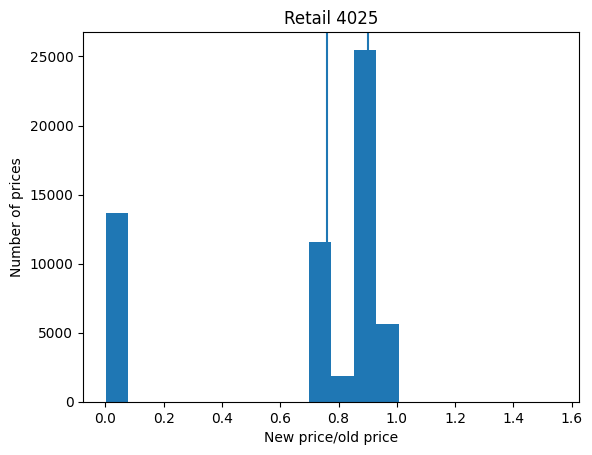

In [1607]:
# Check distribution of changes for retail
for cid in customer_id_list:
    cid = str(cid)
    print("Customer ID", cid)
    cp_r = combo_prices[(combo_prices['customer_id']==cid) & combo_prices['CHANGED'] & (combo_prices['chnl_ind']!='M30') & (combo_prices['MACPRC']!=combo_prices['CurrentMAC'])]
    # & (combo_prices['chnl_ind']!='R90')
    cp_r['ratio'] = cp_r['MACPRC']/cp_r['CurrentMAC']
    fig, ax = plt.subplots()
    ax.hist(cp_r['ratio'], bins=20)
    ax.axvline(desired_r30[cid])
    ax.axvline(desired_r90[cid])
    # if cid not in r90_not_exists:
    #     ax.axvline(desired_r90[cid])
    ax.set_xlabel("New price/old price")
    ax.set_ylabel("Number of prices")
    ax.set_title("Retail "+cid)

Customer ID 4025


/var/tmp/ipykernel_2239/2929723757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_r['ratio'] = cp_r['MACPRC']/cp_r['CurrentMAC']


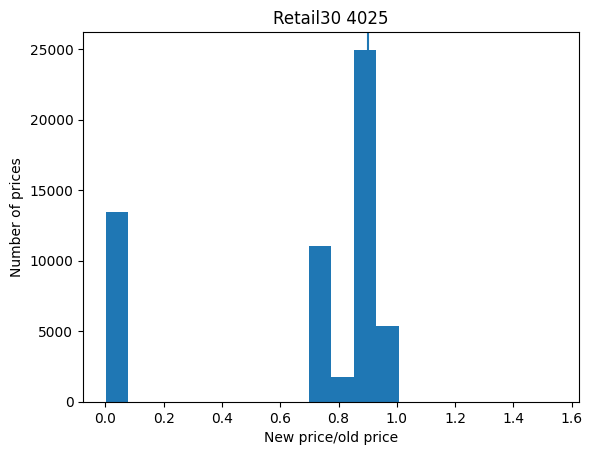

In [1608]:
# Check distribution of changes for only retail 30 (R30)
for cid in customer_id_list:
    cid = str(cid)
    print("Customer ID", cid)
    cp_r = combo_prices[(combo_prices['customer_id']==cid) & combo_prices['CHANGED'] & (combo_prices['chnl_ind']!='M30') & (combo_prices['chnl_ind']!='R90') & (combo_prices['MACPRC']!=combo_prices['CurrentMAC'])]
    cp_r['ratio'] = cp_r['MACPRC']/cp_r['CurrentMAC']
    fig, ax = plt.subplots()
    ax.hist(cp_r['ratio'], bins=20)
    ax.axvline(desired_r30[cid])
 #  ax.axvline(desired_r90[cid])
    ax.set_xlabel("New price/old price")
    ax.set_ylabel("Number of prices")
    ax.set_title("Retail30 "+cid)




Customer ID 4025


/var/tmp/ipykernel_2239/2026798003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_m['ratio'] = cp_m['MACPRC']/cp_m['CurrentMAC']


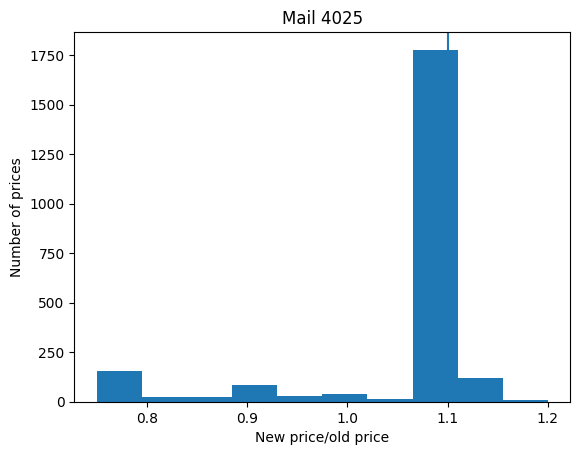

In [1609]:
# Check distribution of changes for mail
for cid in customer_id_list:
    cid = str(cid)
    print("Customer ID", cid)
    cp_m = combo_prices[(combo_prices['customer_id']==cid) & combo_prices['CHANGED'] & (combo_prices['chnl_ind']=='M30') & (combo_prices['MACPRC']!=combo_prices['CurrentMAC'])]
    cp_m['ratio'] = cp_m['MACPRC']/cp_m['CurrentMAC']
    fig, ax = plt.subplots()
    ax.hist(cp_m['ratio'])
    ax.axvline(desired_mail[cid])
    ax.set_xlabel("New price/old price")
    ax.set_ylabel("Number of prices")
    ax.set_title("Mail "+cid)


In [1610]:
combo_prices['IS_MAIL'] = combo_prices['chnl_ind']=='M30'
combo_prices['IS_R90'] = combo_prices['chnl_ind'].str.contains('90')

In [1611]:
# Check CVS parity

for cid in customer_id_list:
    cid = str(cid)
    cp = combo_prices[(combo_prices['customer_id']==cid) & ~combo_prices['IS_R90'] & ~combo_prices['IS_MAIL']]
    if 'CVSSP' in cp['chnl_ind'].unique():
        match_vcml = 'CVSSP'
        cp = cp[cp['chnl_ind']!='CVS']
    else:
        match_vcml = 'CVS'
    print("Match VCML", match_vcml)
    print(cp[cp['chnl_ind']!=match_vcml].chnl_ind.unique())
    # print(cp[cp['GPI']=='86805035102015'][['chnl_ind','NEW_PRICE']])
    min_retail = cp[cp['chnl_ind']!=match_vcml].groupby(['GPI', 'NDC'], as_index=False).agg({'NEW_PRICE': min, 'CHANGED': any}).rename(columns={'NEW_PRICE': 'COMPARISON_PRICE', 'CHANGED': 'COMPARISON_CHANGED'})
    cp_check = cp[cp['chnl_ind']==match_vcml].merge(min_retail, on=['GPI', 'NDC'])
    cp_check = cp_check[cp_check['CHANGED'] | cp_check['COMPARISON_CHANGED']]
    print("Violations for", cid, " R30:", (cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']).sum())
    print(cp_check[cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']].head())
    cp = combo_prices[(combo_prices['customer_id']==cid) & combo_prices['IS_R90']]
    if cp.empty:
        continue
    if 'CVSSP90' in cp['chnl_ind'].unique():
        match_vcml = 'CVSSP90'
        cp = cp[cp['chnl_ind']!='CVS90']
    elif 'CVS90' in cp['chnl_ind'].unique():
        match_vcml = 'CVS90'
    else:
        match_vcml = 'R90'
    print("Match VCML90", match_vcml)
    min_retail = cp[cp['chnl_ind']!=match_vcml].groupby(['GPI', 'NDC'], as_index=False).agg({'NEW_PRICE': min, 'CHANGED': any}).rename(columns={'NEW_PRICE': 'COMPARISON_PRICE', 'CHANGED': 'COMPARISON_CHANGED'})
    cp_check = cp[cp['chnl_ind']==match_vcml].merge(min_retail, on=['GPI', 'NDC'])
    cp_check = cp_check[cp_check['CHANGED'] | cp_check['COMPARISON_CHANGED']]
    print("Violations for", cid, " R90:", (cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']).sum())
    if(cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']).any():
        print(cp_check[cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']])

Match VCML CVSSP
['HMA' 'KRG' 'R30' 'RAD' 'TPS' 'WAG' 'WMT' 'CARD' 'ELEV' 'EPIC' 'AHOLD'
 'MIEJER' 'PUBLIX' 'Specialty' 'ALBERTSONS']
Violations for 4025  R30: 411
   customer_id chnl_ind        MAC             GPI          NDC   PRICE  \
8         4025    CVSSP  MAC402541  33300007207050  ***********  3.5190   
11        4025    CVSSP  MAC402541  32100020000305  ***********  0.2311   
12        4025    CVSSP  MAC402541  33100030000310  ***********  0.8862   
16        4025    CVSSP  MAC402541  56202010200420  ***********  0.3436   
21        4025    CVSSP  MAC402541  27997002350320  ***********  0.2232   

                       GPI_NDC MAC_LIST  IS_MAIL  IS_R90  ...    MACPRC  \
8   33300007207050_***********   402541    False   False  ...  2.639250   
11  32100020000305_***********   402541    False   False  ...  0.173325   
12  33100030000310_***********   402541    False   False  ...  0.664650   
16  56202010200420_***********   402541    False   False  ...  0.257700   
21  279970

In [1612]:
cp_check[cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']]['chnl_ind']

1       CVSSP90
7       CVSSP90
8       CVSSP90
11      CVSSP90
16      CVSSP90
         ...   
2532    CVSSP90
2533    CVSSP90
2538    CVSSP90
2541    CVSSP90
2542    CVSSP90
Name: chnl_ind, Length: 701, dtype: object

In [1613]:
# Check R30-R90

for cid in customer_id_list:
    cid = str(cid)
    cp = combo_prices[(combo_prices['customer_id']==cid) & ~combo_prices['IS_MAIL']]
    chnl_ind_list = cp['chnl_ind'].unique()
    print(chnl_ind_list)
    if not any(['90' in chnl_ind for chnl_ind in chnl_ind_list]):
        continue
    for chnl_ind in chnl_ind_list:
        if '90' in chnl_ind:
            continue
        if (chnl_ind+'90' in chnl_ind_list) or (chnl_ind+' 90' in chnl_ind_list):
            comp_r90 = chnl_ind+'90'
        elif chnl_ind in ('WAG', 'WMT', 'RAD', 'KGR', 'KRG') and 'R90CH' in chnl_ind_list:
            comp_r90 = 'R90CH'
        else:
            comp_r90 = 'R90'
        cp30 = cp[cp['chnl_ind']==chnl_ind]
        cp90 = cp[cp['chnl_ind']==comp_r90]
        cp_check = cp30.merge(cp90, on=['GPI', 'NDC'], suffixes=('_R30', '_R90'))
        cp_check = cp_check[cp_check['CHANGED_R30'] | cp_check['CHANGED_R90']]
        
        print(cp_check[cp_check['NEW_PRICE_R90']>cp_check['NEW_PRICE_R30']+0.0001].GPI.value_counts())
        print("Violations for", cid, chnl_ind, ":", (cp_check['NEW_PRICE_R90']>cp_check['NEW_PRICE_R30']+0.0001).sum())

['CVS' 'HMA' 'KRG' 'R30' 'R90' 'RAD' 'TPS' 'WAG' 'WMT' 'CARD' 'ELEV'
 'EPIC' 'AHOLD' 'CVS90' 'CVSSP' 'HMA90' 'KRG90' 'RAD90' 'TPS90' 'WAG90'
 'WMT90' 'CARD90' 'ELEV90' 'EPIC90' 'MIEJER' 'PUBLIX' 'AHOLD90' 'CVSSP90'
 'MIEJER90' 'PUBLIX90' 'Specialty' 'ALBERTSONS' 'ALBERTSONS90']
57100040000310    1
57100070000110    1
75100040000305    1
50280020000130    1
57100020100105    1
59100010100325    1
21755040100335    1
59153070107530    1
04000040107520    1
Name: GPI, dtype: int64
Violations for 4025 CVS : 9
57100010007510    1
90550040003710    1
Name: GPI, dtype: int64
Violations for 4025 HMA : 2
43200010000340    1
36100027100320    1
59500010100405    1
59157060007220    1
85156010100120    1
02200062000320    1
59200025100310    1
72500010100605    1
90050013000125    1
90210030302025    1
46300030102958    1
41200030101010    1
95990221000140    1
43200010000910    1
77203050000152    1
59070070000306    1
59152020000325    1
57100020100110    1
11000020000110    1
64200010002010   

In [1614]:
cp[(cp['GPI']=='57100010007505') & (cp['chnl_ind'].str.contains('CVSSP'))][['customer_id', 'chnl_ind', 'MAC', 'PRICE', 'GPI_NDC',
       'MAC_LIST', 
       'CurrentMAC',  'MACPRC', 'CHANGED',
       'NEW_PRICE', ]]

,customer_id,chnl_ind,MAC,PRICE,GPI_NDC,MAC_LIST,CurrentMAC,MACPRC,CHANGED,NEW_PRICE
40393,4025,CVSSP,MAC402541,0.1114,57100010007505_***********,402541,0.1114,0.08355,True,0.08355
71472,4025,CVSSP90,MAC402591,0.1114,57100010007505_***********,402591,0.1114,0.08355,True,0.08355


In [1615]:
# Check Mail - min(R30, R90)
# Check CVS parity

for cid in customer_id_list:
    cid = str(cid)
    cp = combo_prices[(combo_prices['customer_id']==cid) & ~combo_prices['IS_MAIL']]
    min_retail = cp.groupby(['GPI', 'NDC'], as_index=False).agg({'NEW_PRICE': min, 'CHANGED': any}).rename(columns={'NEW_PRICE': 'COMPARISON_PRICE', 'CHANGED': 'COMPARISON_CHANGED'})
    cp_check = combo_prices[(combo_prices['customer_id']==cid) & combo_prices['IS_MAIL']].merge(min_retail, on=['GPI', 'NDC'])
    cp_check = cp_check[cp_check['CHANGED'] | cp_check['COMPARISON_CHANGED']]
    print("Violations for", cid, " MAIL:", (cp_check['NEW_PRICE']>cp_check['COMPARISON_PRICE']).sum())


Violations for 4025  MAIL: 25


In [1616]:
# check overrides 1
changed = combo_prices[combo_prices['CHANGED']]
print("Disallowed prices changed:", changed['GPI'].isin(overrides_1['GPI_CD'].unique()).sum())



Disallowed prices changed: 0


In [1617]:
# check overrides 2
for customer_id in customer_id_list:
    o2 = overrides_2[overrides_2['CLIENT']==str(customer_id)]
    ch = changed[changed['customer_id']==str(customer_id)]
    print("Disallowed prices changed for", customer_id, ":", ch['GPI'].isin(o2['GPI'].unique()).sum())

Disallowed prices changed for 4025 : 0


In [1618]:
# check overrides 3
for customer_id in customer_id_list:
    o3 = overrides_3[overrides_3['CLIENT']==str(customer_id)]
    for vcml_id in o3['VCML_ID'].unique():
        o3v = overrides_3[overrides_3['VCML_ID']==vcml_id]
        ch = changed[(changed['customer_id']==str(customer_id)) & (changed['MACLIST']==vcml_id)]
        print("Disallowed prices changed for", customer_id, vcml_id, ":", ch['GPI'].isin(o3v['GPI'].unique()).sum(), "out of", len(ch))

Disallowed prices changed for 4025 MAC40255 : 0 out of 2058
Disallowed prices changed for 4025 MAC40257 : 0 out of 2024
Disallowed prices changed for 4025 MAC402537 : 69 out of 1711


In [1477]:
overrides_3

,CLIENT,REGION,VCML_ID,GPI,NDC,MAC_PRICE,UNC_PRICE,DATE_ADDED,SOURCE,REASON
0,4025,ALL,MAC40255,12504060200115,***********,7.879622,7.879622,2023-05-05,WAG_UNC,WAG_UNC
1,4025,ALL,MAC40255,49200030000310,***********,0.112802,0.112802,2023-05-05,WAG_UNC,WAG_UNC
2,4025,ALL,MAC40255,90050030003705,***********,2.142649,2.142649,2023-05-05,WAG_UNC,WAG_UNC
3,4025,ALL,MAC40257,27200027000310,***********,0.121100,0.143300,2023-02-27,WMT_UNC,WMT_UNC
4,4025,ALL,MAC40257,27200027000320,***********,0.143300,0.143300,2023-02-27,WMT_UNC,WMT_UNC
...,...,...,...,...,...,...,...,...,...,...
188,4025,ALL,MAC402537,73209902100310,***********,0.098900,0.098900,2023-02-27,WMT_UNC,WMT_UNC
189,4025,ALL,MAC402537,73209902100320,***********,0.098900,0.098900,2023-02-27,WMT_UNC,WMT_UNC
190,4025,ALL,MAC402537,83200030200325,***********,0.121100,0.121100,2023-02-27,WMT_UNC,WMT_UNC
191,4025,ALL,MAC402537,85155516000320,***********,0.143300,0.143300,2023-02-27,WMT_UNC,WMT_UNC
